In [1]:
import sqlite3
connection = sqlite3.connect('student_grades.db')
print("Database created and connected!")

Database created and connected!


In [3]:
cursor = connection.cursor()
print("Cursor created!")

Cursor created!


In [7]:
cursor = connection.cursor()
print("Cursor created!")
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

print("Students table created!")

Cursor created!
Students table created!


In [159]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Grades table created!")

Grades table created!


In [59]:
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

connection.commit()

print("Data inserted into the ss table!")

Data inserted into the ss table!


In [20]:
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 80),
    (3, 'English', 77),
    (3, 'History', 90),
    (4, 'Math', 98),
    (4, 'English', 95),
    (4, 'History', 89),
    (5, 'Math', 90),
    (5, 'English', 99),
    (5, 'History', 86)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

connection.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


In [30]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

joined_data = cursor.fetchall()

print("Joined students and grades:")
for row in joined_data:
    print(row)

Joined students and grades:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 80)
('Carol', 'White', 'English', 77)
('Carol', 'White', 'History', 90)
('David', 'Brown', 'Math', 98)
('David', 'Brown', 'English', 95)
('David', 'Brown', 'History', 89)
('Eve', 'Davis', 'Math', 90)
('Eve', 'Davis', 'English', 99)
('Eve', 'Davis', 'History', 86)


In [61]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
''')

average_grade = cursor.fetchall()

print("Average grade:")
for row in average_grade:
    print(row)

Average grade:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 82.33333333333333)
('David', 'Brown', 94.0)
('Eve', 'Davis', 91.66666666666667)


In [65]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
ORDER BY average_grade DESC
LIMIT 1
''')

highest_average_grade = cursor.fetchall()

print("Student with the highest average grade:")
for row in highest_average_grade:
    print(row)

Student with the highest average grade:
('David', 'Brown', 94.0)


In [69]:
cursor.execute('''
SELECT AVG(grade) FROM grades WHERE subject = 'Math'
''')
average_math_grade = cursor.fetchone()[0]

print(f"Average grade for Math: {average_math_grade}")

Average grade for Math: 89.0


In [71]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')

grade_above_90 = cursor.fetchall()

print("Students scored above 90:")
for row in grade_above_90:
    print(row)

Students scored above 90:
('Alice', 'Johnson', 95)
('David', 'Brown', 98)
('David', 'Brown', 95)
('Eve', 'Davis', 99)


In [135]:
import pandas as pd
students_df = pd.read_sql_query('SELECT * FROM students', connection)
students_df.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [139]:
import pandas as pd
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)
grades_df.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [141]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

joined_data = cursor.fetchall()

print("Joined students and grades:")
for row in joined_data:
    print(row)

import pandas as pd
joined_df = pd.merge(students_df, grades_df, on = 'student_id')
print(joined_df[['first_name', 'last_name', 'subject', 'grade']])

Joined students and grades:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 80)
('Carol', 'White', 'English', 77)
('Carol', 'White', 'History', 90)
('David', 'Brown', 'Math', 98)
('David', 'Brown', 'English', 95)
('David', 'Brown', 'History', 89)
('Eve', 'Davis', 'Math', 90)
('Eve', 'Davis', 'English', 99)
('Eve', 'Davis', 'History', 86)
   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     80
7       Carol     White  English     77
8       Carol     White  History     90
9       David     Brown     Math     98
10      David     Brown  English     95
11 

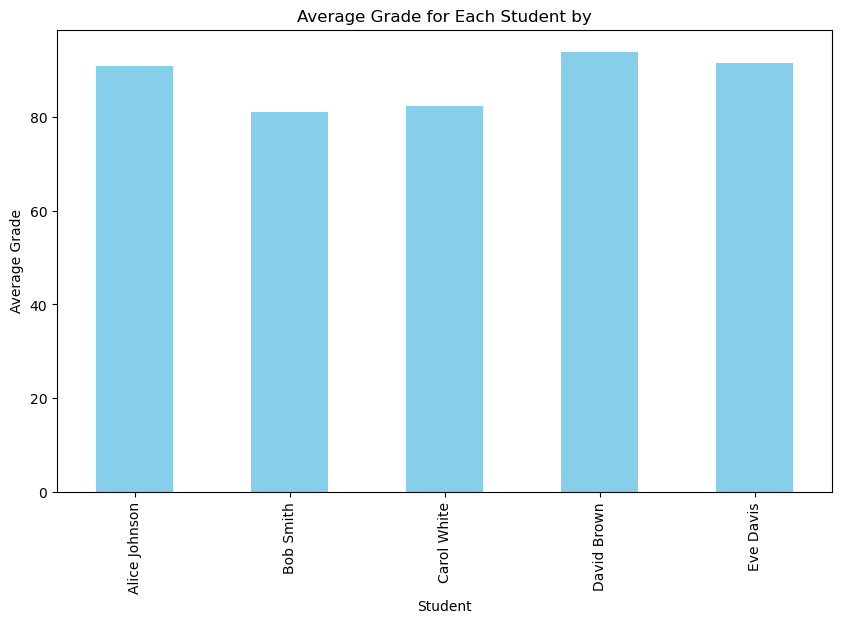

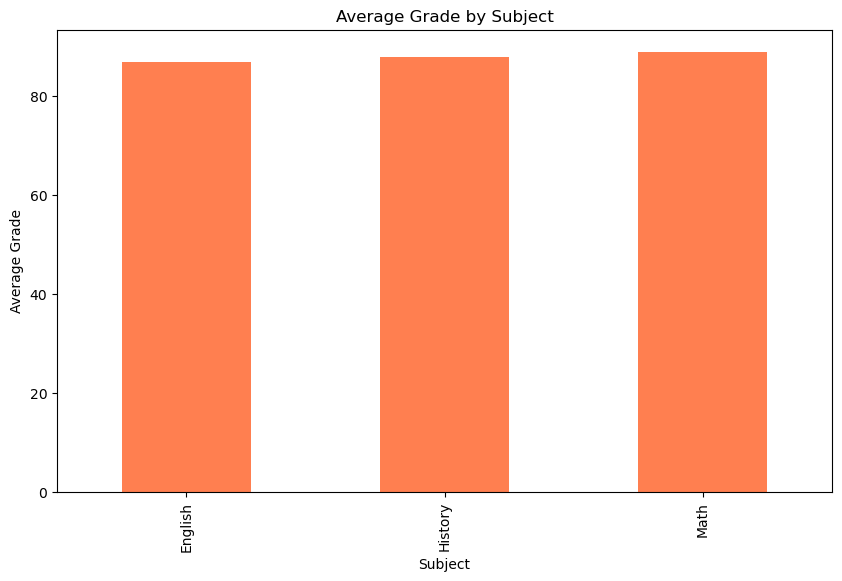

In [147]:
import matplotlib.pyplot as plt

joined_df['full_name'] = joined_df['first_name'] + ' ' + joined_df['last_name']

student_avg_grades = joined_df.groupby('full_name')['grade'].mean()

plt.figure(figsize=(10,6))
student_avg_grades.plot(kind='bar', color='skyblue')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Student by')
plt.show()

subject_avg_grades = joined_df.groupby('subject')['grade'].mean()

plt.figure(figsize=(10,6))
subject_avg_grades.plot(kind='bar', color='coral')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade by Subject')
plt.show()

Highest grade in each subject:
('Alice', 'Johnson', 'History', 90)
('Carol', 'White', 'History', 90)
('David', 'Brown', 'Math', 98)
('Eve', 'Davis', 'English', 99)


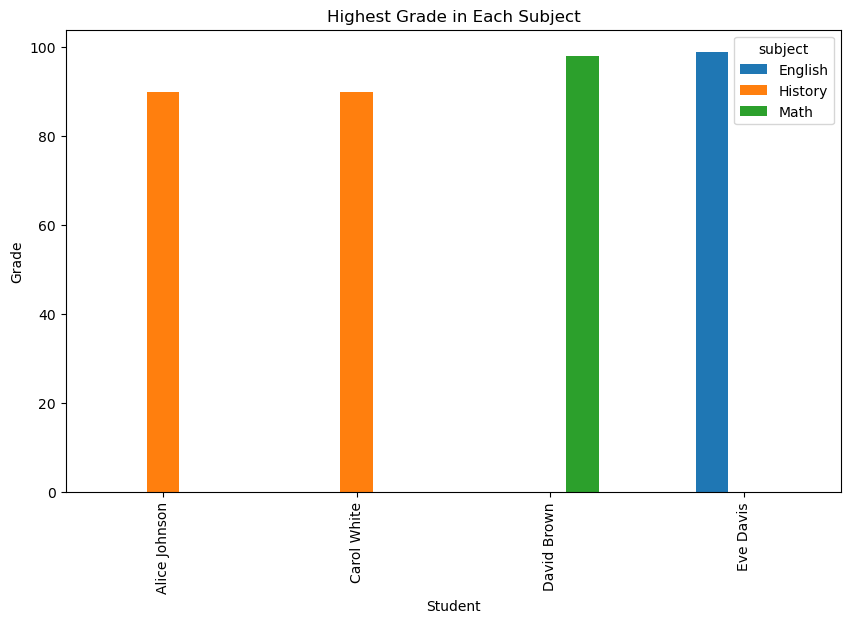

In [157]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade) IN (
    SELECT subject, MAX(grade)
    FROM grades
    GROUP BY subject
);
''')

highest_grade_subject = cursor.fetchall()

print("Highest grade in each subject:")
for row in highest_grade_subject:
    print(row)
    
highest_grades_df = pd.DataFrame(highest_grade_subject, columns=['first_name', 'last_name', 'subject', 'grade'])

highest_grades_df['full_name'] = highest_grades_df['first_name'] + ' ' + highest_grades_df['last_name']

pivot_df = highest_grades_df.pivot(index='full_name', columns='subject', values='grade')

pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Highest Grade in Each Subject')
plt.xlabel('Student')
plt.ylabel('Grade')

plt.show()